## (a) Importing libraries

In [34]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from keras_tuner import RandomSearch
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, roc_auc_score
import seaborn as sns

## (b) Data loading and preparation

In [35]:
# load datasets
white_wine = pd.read_csv('winequality-white.csv', sep=';')
red_wine = pd.read_csv('winequality-red.csv', sep=';')

In [36]:
# assign labels
white_wine['type'] = 'white'
red_wine['type'] = 'red'

In [37]:
# merge datasets
wine = pd.concat([white_wine, red_wine])

In [38]:
# encode labels
wine['type'] = wine['type'].map({'white': 0, 'red': 1})

In [39]:
# split features and labels
X = wine.drop('type', axis=1)
y = wine['type']

In [40]:
# normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [41]:
# split into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [42]:
print(X_train)

[[-0.86035472 -1.0306286  -0.26587363 ... -1.08383282  0.50996897
   1.35322771]
 [-0.16608919 -1.15211771 -0.26587363 ... -0.94941918 -1.2508602
   1.35322771]
 [-0.55179227 -0.90913948  0.00940621 ...  0.05868313  0.25842195
   1.35322771]
 ...
 [ 4.77091014 -0.42318303  2.07400501 ...  0.9323718  -0.66391714
   0.20799905]
 [ 1.29958248  0.36649621  1.31698545 ...  2.47812868  2.43849615
   1.35322771]
 [ 0.68245757 -0.42318303  0.21586609 ...  0.66354452 -0.07697409
   2.49845638]]


## (c) Model development
- Design, train and evaluate neural network models
- Designed 5 different neural network architectures to be trained

In [43]:
# Model 1
# Two dense layers (one hidden layer)
model1 = Sequential()
model1.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model1.add(Dense(1, activation='sigmoid'))

In [44]:
# Model 2
# Three dense layers (two hidden layers)
model2 = Sequential()
model2.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [45]:
# Model 3
# Four dense layers (three hidden layers)
model3 = Sequential()
model3.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model3.add(Dense(64, activation='relu'))
model3.add(Dense(32, activation='relu'))
model3.add(Dense(1, activation='sigmoid'))

In [46]:
# Model 4
# Three dense layers with dropout
model4 = Sequential()
model4.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model4.add(Dropout(0.5))
model4.add(Dense(32, activation='relu'))
model4.add(Dropout(0.5))
model4.add(Dense(1, activation='sigmoid'))

In [47]:
# Model 5
# Four dense layers with dropout and batch normalisation
model5 = Sequential()
model5.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(64, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(32, activation='relu'))
model5.add(BatchNormalization())
model5.add(Dropout(0.5))
model5.add(Dense(1, activation='sigmoid'))

In [48]:
models = [model1, model2, model3, model4, model5]

Training model 1
Epoch 1/100
143/143 [==============================] - 3s 11ms/step - loss: 0.2854 - accuracy: 0.9254 - val_loss: 0.1100 - val_accuracy: 0.9836
Epoch 2/100
143/143 [==============================] - 1s 7ms/step - loss: 0.0742 - accuracy: 0.9910 - val_loss: 0.0586 - val_accuracy: 0.9867
Epoch 2: early stopping


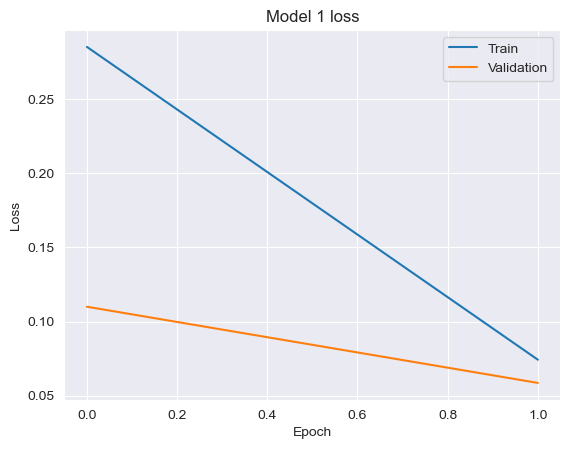

Training model 2
Epoch 1/100
143/143 [==============================] - 2s 7ms/step - loss: 0.1367 - accuracy: 0.9833 - val_loss: 0.0435 - val_accuracy: 0.9897
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.0324 - accuracy: 0.9947 - val_loss: 0.0335 - val_accuracy: 0.9938
Epoch 2: early stopping


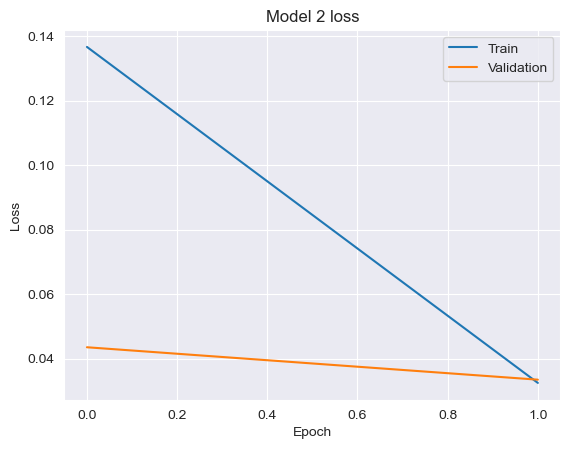

Training model 3
Epoch 1/100
143/143 [==============================] - 3s 10ms/step - loss: 0.1579 - accuracy: 0.9604 - val_loss: 0.0372 - val_accuracy: 0.9887
Epoch 2/100
143/143 [==============================] - 1s 10ms/step - loss: 0.0273 - accuracy: 0.9947 - val_loss: 0.0279 - val_accuracy: 0.9938
Epoch 2: early stopping


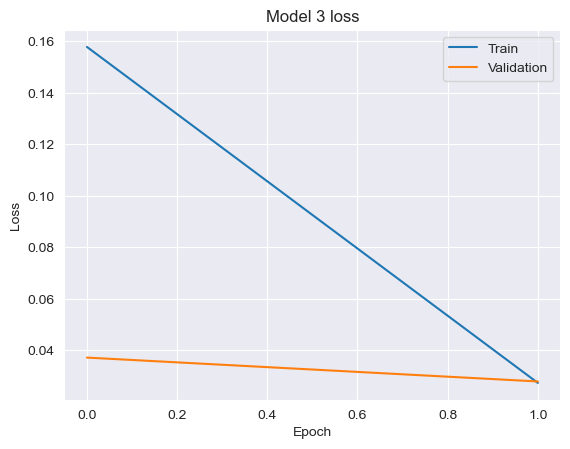

Training model 4
Epoch 1/100
143/143 [==============================] - 4s 8ms/step - loss: 0.3651 - accuracy: 0.8570 - val_loss: 0.0806 - val_accuracy: 0.9856
Epoch 2/100
143/143 [==============================] - 1s 4ms/step - loss: 0.1052 - accuracy: 0.9703 - val_loss: 0.0421 - val_accuracy: 0.9897
Epoch 2: early stopping


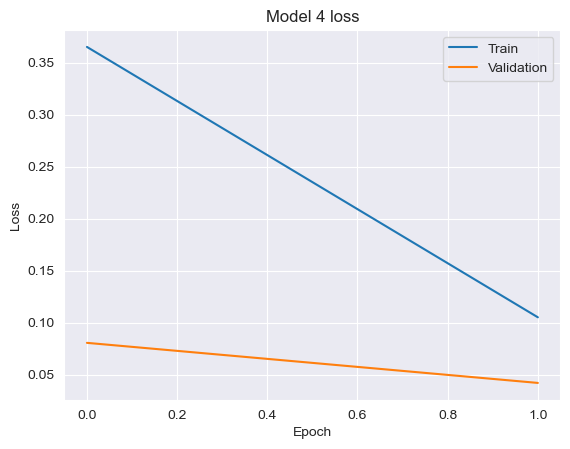

Training model 5
Epoch 1/100
143/143 [==============================] - 3s 7ms/step - loss: 0.4757 - accuracy: 0.7860 - val_loss: 0.1722 - val_accuracy: 0.9600
Epoch 2/100
143/143 [==============================] - 1s 6ms/step - loss: 0.1769 - accuracy: 0.9477 - val_loss: 0.0706 - val_accuracy: 0.9774
Epoch 2: early stopping


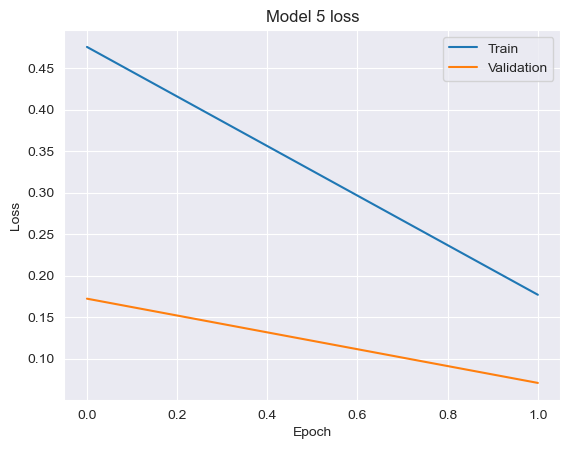

In [49]:
# Compile and train models
for i, model in enumerate(models, 1):
    print(f'Training model {i}')
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=100, callbacks=[es])

    # Plot training/validation loss
    plt.figure(i)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'Model {i} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper right')
    plt.show()

## (d) Model tuning 
- Perform hyperparameter tuning 

In [50]:
def build_model(hp):
    model = Sequential()
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu', input_shape=(X_train.shape[1],)))
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), 
                    activation='relu'))
    model.add(Dense(1, activation='sigmoid'))
    model.compile(
        optimizer=hp.Choice('optimizer', values=['adam','sgd','rmsprop']),
        loss='binary_crossentropy', 
        metrics=['accuracy'])
    return model

tuner = RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=3)

tuner.search(X_train, y_train, epochs=5, validation_data=(X_val, y_val))

INFO:tensorflow:Reloading Tuner from .\untitled_project\tuner0.json
INFO:tensorflow:Oracle triggered exit


## (e) Model evaluation
- Displaying confusion matrix and ROC curve

In [51]:
# Fetch the best model
best_model = tuner.get_best_models(num_models=1)[0]

In [52]:
# Predict the test set results
y_pred = best_model.predict(X_test)
y_pred = (y_pred > 0.5)

31/31 [==============================] - 0s 2ms/step


In [53]:
# Compute and print the performance metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\n")
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("\n")
print("Accuracy Score:")
print(accuracy_score(y_test, y_pred))

Confusion Matrix:
[[737   0]
 [  3 235]]


Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       737
           1       1.00      0.99      0.99       238

    accuracy                           1.00       975
   macro avg       1.00      0.99      1.00       975
weighted avg       1.00      1.00      1.00       975



Accuracy Score:
0.9969230769230769


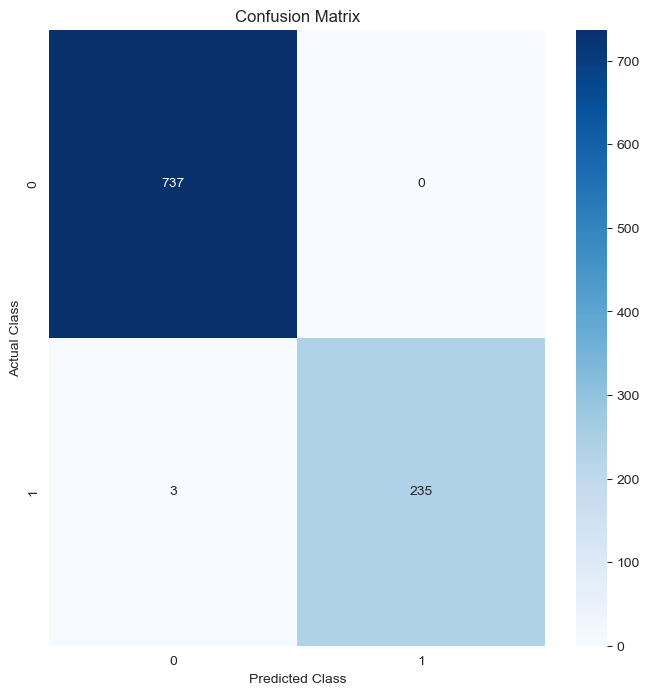

In [54]:
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8,8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel("Predicted Class")
plt.ylabel('Actual Class')
plt.show()

In [55]:
# Calculate the probabilities of the predictions
y_test_prob = best_model.predict(X_test)

31/31 [==============================] - 0s 2ms/step


In [56]:
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_test_prob)

In [57]:
# Calculate AUC score
auc_score = roc_auc_score(y_test, y_test_prob)

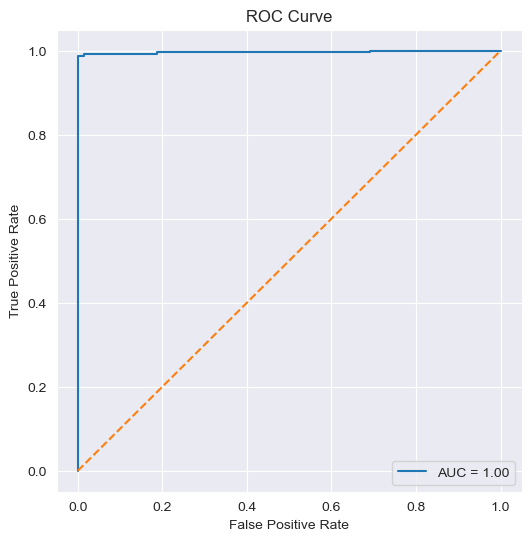

In [58]:
# Plot ROC curve
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='best')
plt.show()